In [2]:
#importando bibliotecas
import pandas as pd
import numpy as np

In [3]:
#criando uma pasta nova no colab com os arquivos do repositório git
!git clone https://github.com/beatrizfariasilva/Formacao-em-Machine-Learning.git

Cloning into 'Formacao-em-Machine-Learning'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 140.10 KiB | 1.15 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
#importando a base de dados
df_netflix = pd.read_csv("Formacao-em-Machine-Learning/netflix_daily_top_10.csv")

In [5]:
df_netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


## ETAPA 1 - TIPOS DE DADOS

In [6]:
#visualisando os tipos de dados
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB




*   3 colunas do tipo numérico
*   7 colunas do tipo categóricas



## ETAPA 2 - PERÍODO DA ANÁLISE FEITA

In [7]:
import datetime as dt

In [8]:
#pegando o menor valor da coluna 'As of'
inicio=pd.to_datetime(df_netflix['As of']).dt.date.min()

In [9]:
print(inicio)

2020-04-01


In [10]:
#pegando o menor valor da coluna 'As of'
fim=pd.to_datetime(df_netflix['As of']).dt.date.max()

In [11]:
print(fim)

2022-03-11


## ETAPA 3 - TAMANHO DA BASE DE DADOS

In [12]:
df_netflix.shape

(7100, 10)

o elemento [0] da trupla corresponde a quantidade de linhas, enquanto o elemento [1] corresponde a quantidade de colunas


*   Linhas: 7100 ou dados
*   Colunas: 10



## ETAPA 4 - DADOS NULOS

In [13]:
df_netflix.isna().sum()


,0
As of,0
Rank,0
Year to Date Rank,0
Last Week Rank,0
Title,0
Type,0
Netflix Exclusive,2501
Netflix Release Date,0
Days In Top 10,0
Viewership Score,0


Na coluna "Netflix Exclusive" há 2501 valores "N/A"

In [14]:
#entendendo melhor a coluna
df_netflix['Netflix Exclusive'].value_counts()

,count
Netflix Exclusive,
Yes,4599


Percebe-se que a unica opção de resposta além de N/A é 'Yes', o que pode nos levar a entender que os N/A seriam na verdade 'Não'.

## ETAPA 5 - OUTLIERS

In [15]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


<Axes: >

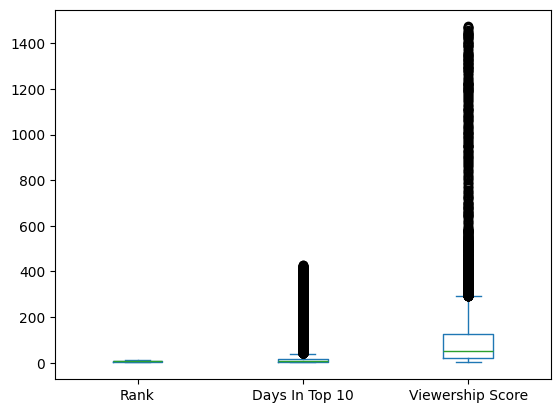

In [16]:
#gerando bloxpot para cada dado numérico
df_netflix.plot.box()

Percebe-se que **Days In Top 10** e **Viewership Score** são as variáveis numéricas com maior número de outliers

<Axes: ylabel='Frequency'>

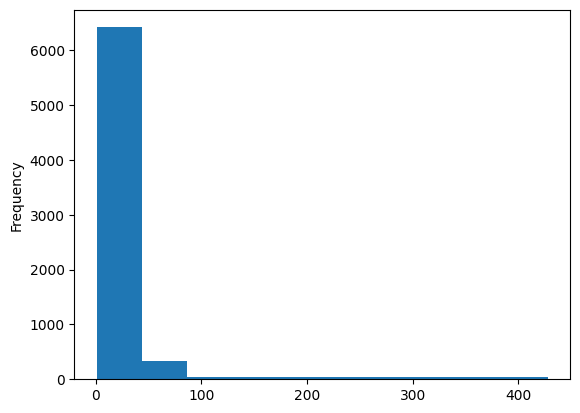

In [17]:
#distribuição da variável Days In Top 10
df_netflix['Days In Top 10'].plot.hist()

<Axes: ylabel='Frequency'>

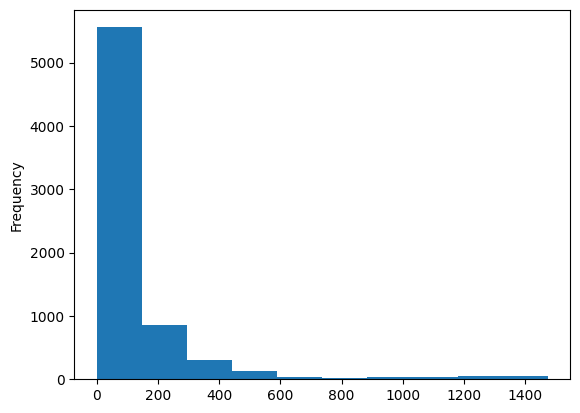

In [18]:
#distribuição da variável Viewership Score
df_netflix['Viewership Score'].plot.hist()

Claramente nenhuma das distribuições segue o padrão normal, então vamos utilizar o **Método de Turkey** para análise de outliers

In [20]:
#days in top 10 - calculo dos quantis e ranger
q1=df_netflix['Days In Top 10'].quantile(0.25)
q3=df_netflix['Days In Top 10'].quantile(0.75)
riq=q3-q1

In [21]:
limite_inferior=q1-(riq*1.5)
limite_superior=q3+(riq*1.5)

In [23]:
len(df_netflix[(df_netflix['Days In Top 10']>limite_superior) | (df_netflix['Days In Top 10']<limite_inferior)])

743

743 valores são outliers

In [24]:
#days in top 10 - calculo dos quantis e ranger
q1=df_netflix['Viewership Score'].quantile(0.25)
q3=df_netflix['Viewership Score'].quantile(0.75)
riq=q3-q1

In [25]:
limite_inferior=q1-(riq*1.5)
limite_superior=q3+(riq*1.5)

In [26]:
len(df_netflix[(df_netflix['Viewership Score']>limite_superior) | (df_netflix['Viewership Score']<limite_inferior)])

698

698 valores são outliers